In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# allow plots to appear directly in the notebook
%matplotlib inline

In [224]:
data = pd.read_csv('C:/Users/sakshasi/Downloads/nanoparticles_adhesive_strength.csv', delimiter = ';')

## 1. Analyze Data

In [225]:
data.head()

,shear_rate,particle_diameter,particles_adhering
0,50,0.720,25.60
1,50,0.720,16.56
2,50,0.720,22.13
3,50,0.968,25.79
4,50,0.968,29.16


In [226]:
print('shape -> ', data.shape)
print(data.isnull().any())

shape ->  (57, 3)
shear_rate            False
particle_diameter     False
particles_adhering    False
dtype: bool


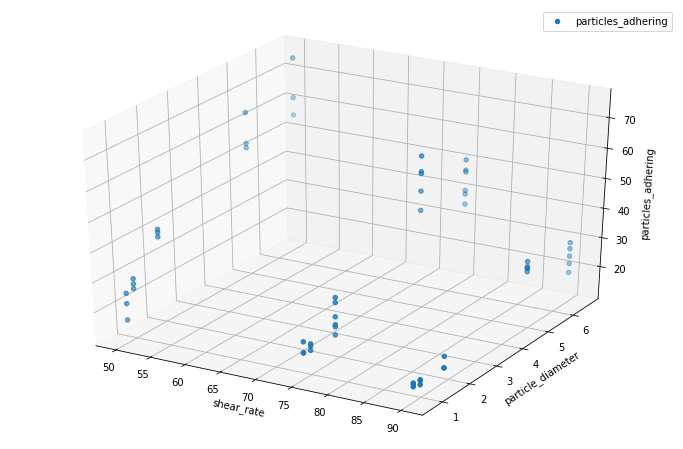

In [227]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure() 
ax = fig.gca(projection ='3d') 
fig.set_size_inches(12, 8, forward=True)
  
ax.scatter(data.shear_rate, data.particle_diameter, data.particles_adhering, label ='particles_adhering', s=20) 
ax.legend() 
# ax.view_init(45, 45) 
ax.set_xlabel('shear_rate')
ax.set_ylabel('particle_diameter')
ax.set_zlabel('particles_adhering')
  
plt.show() 

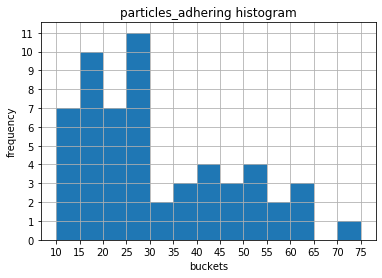

In [228]:
# plotting histogram of output

bins = np.arange(10, 80, 5)
plt.hist(data.particles_adhering, bins = bins)
fig.set_size_inches(15, 8, forward=True)

plt.yticks(np.arange(0, 12, 1))
plt.xticks(bins)
plt.title('particles_adhering histogram')
plt.ylabel('frequency')
plt.xlabel('buckets')
plt.grid()

In [229]:
# covariance calculation to check if any independent variable can be dropped

# plt.scatter(data.shear_rate, data.particles_adhering)
print("cov(shear_rate, particles_adhering) -> ", np.cov(data.shear_rate, data.particles_adhering)[0][1])

# plt.scatter(data.particle_diameter, data.particles_adhering)
print("cov(particle_diameter, particles_adhering) -> ", np.cov(data.particle_diameter, data.particles_adhering)[0][1])

cov(shear_rate, particles_adhering) ->  -121.8459116541353
cov(particle_diameter, particles_adhering) ->  24.455714376566412


## 2. Data Segregation

In [230]:
# Split data into train and test data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

# standardize the data, feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## 3. Linear Regression Model - Base Model

In [231]:
# Training linear model
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print('intercept -> ', regressor.intercept_)
print('slope -> ', regressor.coef_)

intercept ->  [30.75511111]
slope ->  [[-8.47173392 10.39077032]]


In [232]:
# predicting the test result 
y_pred_LR = np.round(regressor.predict(X_test), 2)

# evaluation 
lr_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)), 3)
lr_mae = round(metrics.mean_absolute_error(y_test, y_pred_LR), 3)
print('RMSE -> ', lr_rmse)
print('Mean Absolute Error -> ', lr_mae)

RMSE ->  9.227
Mean Absolute Error ->  7.16


## 4. Neural Network Model

In [233]:
# design model
model = Sequential()
model.add(Dense(3, activation='relu', input_dim=2))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_37 (Dense)             (None, 3)                 12        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 4         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [234]:
# compiling and fitting

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(X_train, y_train, batch_size=5, epochs=500)

Epoch 1/500
45/45 [==============================] - 0s 5ms/step - loss: 1146.3665 - mean_squared_error: 1146.3665
Epoch 2/500
45/45 [==============================] - 0s 555us/step - loss: 1143.8741 - mean_squared_error: 1143.8741
Epoch 3/500
45/45 [==============================] - 0s 845us/step - loss: 1141.2078 - mean_squared_error: 1141.2078
Epoch 4/500
45/45 [==============================] - 0s 845us/step - loss: 1138.5182 - mean_squared_error: 1138.5182
Epoch 5/500
45/45 [==============================] - 0s 733us/step - loss: 1135.8101 - mean_squared_error: 1135.8099
Epoch 6/500
45/45 [==============================] - 0s 889us/step - loss: 1132.6186 - mean_squared_error: 1132.6187
Epoch 7/500
45/45 [==============================] - 0s 666us/step - loss: 1129.6892 - mean_squared_error: 1129.6892
Epoch 8/500
45/45 [==============================] - 0s 866us/step - loss: 1126.3112 - mean_squared_error: 1126.3113
Epoch 9/500
45/45 [==============================] - 0s 733us/step

45/45 [==============================] - 0s 578us/step - loss: 506.1479 - mean_squared_error: 506.1479
Epoch 71/500
45/45 [==============================] - 0s 378us/step - loss: 490.8472 - mean_squared_error: 490.8472
Epoch 72/500
45/45 [==============================] - 0s 467us/step - loss: 476.9796 - mean_squared_error: 476.9796
Epoch 73/500
45/45 [==============================] - 0s 710us/step - loss: 463.5117 - mean_squared_error: 463.5117
Epoch 74/500
45/45 [==============================] - 0s 600us/step - loss: 448.6346 - mean_squared_error: 448.6347
Epoch 75/500
45/45 [==============================] - 0s 489us/step - loss: 435.7531 - mean_squared_error: 435.7531
Epoch 76/500
45/45 [==============================] - 0s 666us/step - loss: 421.5332 - mean_squared_error: 421.5332
Epoch 77/500
45/45 [==============================] - 0s 556us/step - loss: 408.0629 - mean_squared_error: 408.0628
Epoch 78/500
45/45 [==============================] - 0s 644us/step - loss: 395.2263 

45/45 [==============================] - 0s 422us/step - loss: 83.1563 - mean_squared_error: 83.1563
Epoch 141/500
45/45 [==============================] - 0s 533us/step - loss: 82.4995 - mean_squared_error: 82.4995
Epoch 142/500
45/45 [==============================] - 0s 644us/step - loss: 82.2208 - mean_squared_error: 82.2208
Epoch 143/500
45/45 [==============================] - 0s 489us/step - loss: 81.7314 - mean_squared_error: 81.7314
Epoch 144/500
45/45 [==============================] - 0s 556us/step - loss: 81.3734 - mean_squared_error: 81.3734
Epoch 145/500
45/45 [==============================] - 0s 644us/step - loss: 80.8990 - mean_squared_error: 80.8990
Epoch 146/500
45/45 [==============================] - 0s 711us/step - loss: 80.6712 - mean_squared_error: 80.6712
Epoch 147/500
45/45 [==============================] - 0s 556us/step - loss: 80.2388 - mean_squared_error: 80.2388
Epoch 148/500
45/45 [==============================] - 0s 711us/step - loss: 79.9420 - mean_sq

45/45 [==============================] - 0s 556us/step - loss: 61.6491 - mean_squared_error: 61.6491
Epoch 211/500
45/45 [==============================] - 0s 622us/step - loss: 61.4262 - mean_squared_error: 61.4262
Epoch 212/500
45/45 [==============================] - 0s 644us/step - loss: 61.3147 - mean_squared_error: 61.3147
Epoch 213/500
45/45 [==============================] - 0s 733us/step - loss: 61.0682 - mean_squared_error: 61.0682
Epoch 214/500
45/45 [==============================] - 0s 577us/step - loss: 60.9676 - mean_squared_error: 60.9676
Epoch 215/500
45/45 [==============================] - 0s 489us/step - loss: 60.8293 - mean_squared_error: 60.8293
Epoch 216/500
45/45 [==============================] - 0s 511us/step - loss: 60.7249 - mean_squared_error: 60.7249
Epoch 217/500
45/45 [==============================] - 0s 645us/step - loss: 60.4839 - mean_squared_error: 60.4839
Epoch 218/500
45/45 [==============================] - 0s 489us/step - loss: 60.2644 - mean_sq

45/45 [==============================] - 0s 689us/step - loss: 58.2768 - mean_squared_error: 58.2768
Epoch 281/500
45/45 [==============================] - 0s 489us/step - loss: 58.1280 - mean_squared_error: 58.1280
Epoch 282/500
45/45 [==============================] - 0s 422us/step - loss: 58.1520 - mean_squared_error: 58.1520
Epoch 283/500
45/45 [==============================] - 0s 555us/step - loss: 58.1003 - mean_squared_error: 58.1003
Epoch 284/500
45/45 [==============================] - 0s 644us/step - loss: 58.0963 - mean_squared_error: 58.0963
Epoch 285/500
45/45 [==============================] - 0s 378us/step - loss: 58.0839 - mean_squared_error: 58.0839
Epoch 286/500
45/45 [==============================] - 0s 533us/step - loss: 58.1038 - mean_squared_error: 58.1038
Epoch 287/500
45/45 [==============================] - 0s 378us/step - loss: 58.0594 - mean_squared_error: 58.0594
Epoch 288/500
45/45 [==============================] - 0s 355us/step - loss: 58.0553 - mean_sq

45/45 [==============================] - 0s 578us/step - loss: 57.7060 - mean_squared_error: 57.7060
Epoch 351/500
45/45 [==============================] - 0s 822us/step - loss: 57.7023 - mean_squared_error: 57.7023
Epoch 352/500
45/45 [==============================] - 0s 644us/step - loss: 57.6598 - mean_squared_error: 57.6598
Epoch 353/500
45/45 [==============================] - ETA: 0s - loss: 23.3514 - mean_squared_error: 23.35 - 0s 800us/step - loss: 57.6754 - mean_squared_error: 57.6754
Epoch 354/500
45/45 [==============================] - 0s 511us/step - loss: 57.8052 - mean_squared_error: 57.8052
Epoch 355/500
45/45 [==============================] - 0s 444us/step - loss: 57.7790 - mean_squared_error: 57.7790
Epoch 356/500
45/45 [==============================] - 0s 600us/step - loss: 57.7434 - mean_squared_error: 57.7434
Epoch 357/500
45/45 [==============================] - 0s 733us/step - loss: 57.6304 - mean_squared_error: 57.6303
Epoch 358/500
45/45 [===================

45/45 [==============================] - 0s 599us/step - loss: 57.3522 - mean_squared_error: 57.3522
Epoch 421/500
45/45 [==============================] - 0s 622us/step - loss: 57.3913 - mean_squared_error: 57.3913
Epoch 422/500
45/45 [==============================] - 0s 600us/step - loss: 57.3391 - mean_squared_error: 57.3391
Epoch 423/500
45/45 [==============================] - 0s 355us/step - loss: 57.3540 - mean_squared_error: 57.3540
Epoch 424/500
45/45 [==============================] - 0s 644us/step - loss: 57.3316 - mean_squared_error: 57.3316
Epoch 425/500
45/45 [==============================] - 0s 533us/step - loss: 57.3351 - mean_squared_error: 57.3351
Epoch 426/500
45/45 [==============================] - 0s 400us/step - loss: 57.3406 - mean_squared_error: 57.3406
Epoch 427/500
45/45 [==============================] - 0s 422us/step - loss: 57.3319 - mean_squared_error: 57.3319
Epoch 428/500
45/45 [==============================] - 0s 355us/step - loss: 57.3603 - mean_sq

45/45 [==============================] - 0s 489us/step - loss: 57.2119 - mean_squared_error: 57.2119
Epoch 491/500
45/45 [==============================] - 0s 600us/step - loss: 57.1096 - mean_squared_error: 57.1096
Epoch 492/500
45/45 [==============================] - 0s 511us/step - loss: 57.1390 - mean_squared_error: 57.1390
Epoch 493/500
45/45 [==============================] - 0s 467us/step - loss: 57.0977 - mean_squared_error: 57.0977
Epoch 494/500
45/45 [==============================] - 0s 622us/step - loss: 57.1005 - mean_squared_error: 57.1005
Epoch 495/500
45/45 [==============================] - 0s 800us/step - loss: 57.0879 - mean_squared_error: 57.0879
Epoch 496/500
45/45 [==============================] - 0s 400us/step - loss: 57.0887 - mean_squared_error: 57.0887
Epoch 497/500
45/45 [==============================] - 0s 489us/step - loss: 57.1272 - mean_squared_error: 57.1272
Epoch 498/500
45/45 [==============================] - 0s 444us/step - loss: 57.0868 - mean_sq

In [235]:
# predicting the test result 
y_pred_NN = np.round(model.predict(X_test), 2)

# evaluation 
nn_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_NN)), 3)
nn_mae = round(metrics.mean_absolute_error(y_test, y_pred_NN), 3)
print('RMSE -> ', nn_rmse)
print('Mean Absolute Error -> ', nn_mae)

RMSE ->  8.905
Mean Absolute Error ->  6.462


## 5. Random Forest Model

In [236]:
# Training random forest model
from sklearn.ensemble import RandomForestRegressor

regressionForest = RandomForestRegressor(n_estimators = 100, random_state=13)
regressionForest.fit(X_train, y_train.flatten())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=13, verbose=0,
                      warm_start=False)

In [237]:
# predicting the test result 
y_pred_RF = np.round(regressionForest.predict(X_test), 2)

# evaluation 
rf_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)), 3)
rf_mae = round(metrics.mean_absolute_error(y_test, y_pred_RF), 3)
print('RMSE -> ', rf_rmse)
print('Mean Absolute Error -> ', rf_mae)

RMSE ->  7.834
Mean Absolute Error ->  5.537


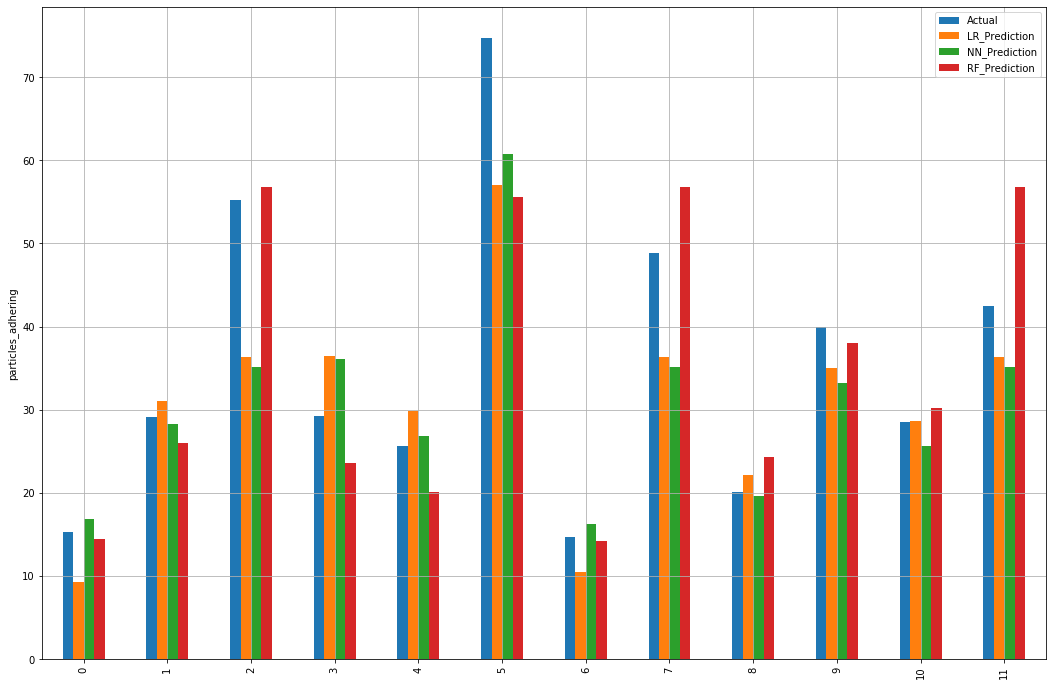

In [238]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'LR_Prediction': y_pred_LR.flatten(), 'NN_Prediction': y_pred_NN.flatten(),
                  'RF_Prediction': y_pred_RF.flatten()})

df.plot(kind='bar', figsize=(18, 12))
plt.ylabel('particles_adhering')
plt.grid()